In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import signal
from scipy.io import wavfile

from IPython.display import Audio, display

%matplotlib inline

In [2]:
# Matplotlib settings to make the plots look a little nicer.

plt.rcParams['font.size']      = 18
plt.rcParams['font.weight']    = 'bold'
plt.rcParams['axes.grid']      = True
plt.rcParams['axes.xmargin']   = 0
plt.rcParams['grid.linestyle'] = ':'
plt.rcParams['figure.figsize'] = (10,6)

In [3]:
def play(x, fs, autoplay=False):
    display(Audio(x, rate=fs, autoplay=autoplay))

In [11]:
def plot_cxSig(t,xx,xlim=None,ylim=None,flim=None,title=None):
    """
    Plot the time domain and spectrogram of a signal.
    t:  Time Vector in seconds.
    xx: time-domain signal
    """
    
    # Compute the Sample Rate
    fs = 1/(t[1]-t[0])

    f, t_spec, Sxx = signal.spectrogram(xx,fs=fs,window='hann',return_onesided=False)
    f    = np.fft.fftshift(f)
    Sxx  = np.fft.fftshift(Sxx,axes=0)
    Sxx_db = 10*np.log10(Sxx)


    fig = plt.figure(figsize=(15,7))

    ax0  = fig.add_subplot(2,1,1)
    ax0.plot(t,np.real(xx),label='Real')
    ax0.plot(t,np.imag(xx),label='Imag')
    ax0.set_xlabel('t [s]')
    ax0.set_ylabel('Amplitude')
    ax0.set_xlim(xlim)
    ax0.set_ylim(ylim)
    ax0.legend(loc='upper right',fontsize='small')

    ax1  = fig.add_subplot(2,1,2)
    mpbl = ax1.pcolormesh(t_spec,f,Sxx_db)
    cbar = fig.colorbar(mpbl,label='PSD [dB]')
    ax1.set_xlabel('t [s]')
    ax1.set_ylabel('f [Hz]')
    ax1.set_xlim(xlim)
    ax1.set_ylim(flim)
    
    if title is not None:
        ax0.set_title(title)

    fig.tight_layout()

    # The next three lines make sure the time-domain plot lines up properly with the spectrogram.
    ax0p = ax0.get_position().bounds
    ax1p = ax1.get_position().bounds
    ax0.set_position((ax0p[0],ax0p[1],ax1p[2],ax0p[3]))

    plt.show()

In [23]:
def plot_sig(t,xx,xlim=None,ylim=None,flim=None,title=None):
    """
    Plot the time domain and spectrogram of a signal.
    t:  Time Vector in seconds.
    xx: time-domain signal
    """
    
    # Compute the Sample Rate
    fs = 1/(t[1]-t[0])

    f, t_spec, Sxx = signal.spectrogram(xx,fs=fs,window='hann')
    Sxx_db = 10*np.log10(Sxx)


    fig = plt.figure(figsize=(15,7))

    ax0  = fig.add_subplot(2,1,1)
    ax0.plot(t,xx)
    ax0.set_xlabel('t [s]')
    ax0.set_ylabel('Amplitude')
    ax0.set_xlim(xlim)
    ax0.set_ylim(ylim)

    ax1  = fig.add_subplot(2,1,2)
    mpbl = ax1.pcolormesh(t_spec,f,10*np.log10(Sxx))
    cbar = fig.colorbar(mpbl,label='PSD [dB]')
    ax1.set_xlabel('t [s]')
    ax1.set_ylabel('f [Hz]')
    ax1.set_xlim(xlim)
    ax1.set_ylim(flim)
    
    if title is not None:
        ax0.set_title(title)

    fig.tight_layout()

    # The next three lines make sure the time-domain plot lines up properly with the spectrogram.
    ax0p = ax0.get_position().bounds
    ax1p = ax1.get_position().bounds
    ax0.set_position((ax0p[0],ax0p[1],ax1p[2],ax0p[3]))

    plt.show()

In [24]:
def sigFloat2Int(sig,dtype='int32'):
    """
    Convert a floating-point signal into an integer signal.
    
    This is needed before saving to a WAV file because
    Windows Media Player will only play PCM Integer WAV files.
    """
    sig = sig/np.max(np.abs(sig))
    i = np.iinfo(dtype)
    abs_max = 2 ** (i.bits - 1)
    offset = i.min + abs_max
    return (sig * abs_max + offset).clip(i.min, i.max).astype(dtype)

In [59]:
# Load in the file and detect the sampling frequency
fname1        = 'out.wav'
fs_wav1, wav1 = wavfile.read(fname1)
duration      = len(wav1) * 1/fs_wav1
t_wav1        = np.arange(len(wav1))*(1/fs_wav1) 

fs_new = fs_wav1*2
N_new  = int(duration * fs_new)
t_wav2 = np.arange(N_new)*(1/fs_new)
wav2_i  = np.interp(t_wav2,t_wav1,wav1[:,0])
wav2_q  = np.interp(t_wav2,t_wav1,wav1[:,1])

In [57]:
len(wav2_i)

1727372

In [52]:
N_new

1727372.0

In [25]:
wav1 = wav1[:,0] + 1j*wav1[:,1]

In [26]:
wav1 = wav1/np.max(np.abs(wav1)) # Normalize
# We need a new time vector because because the WAV file is a different length than the original signal.


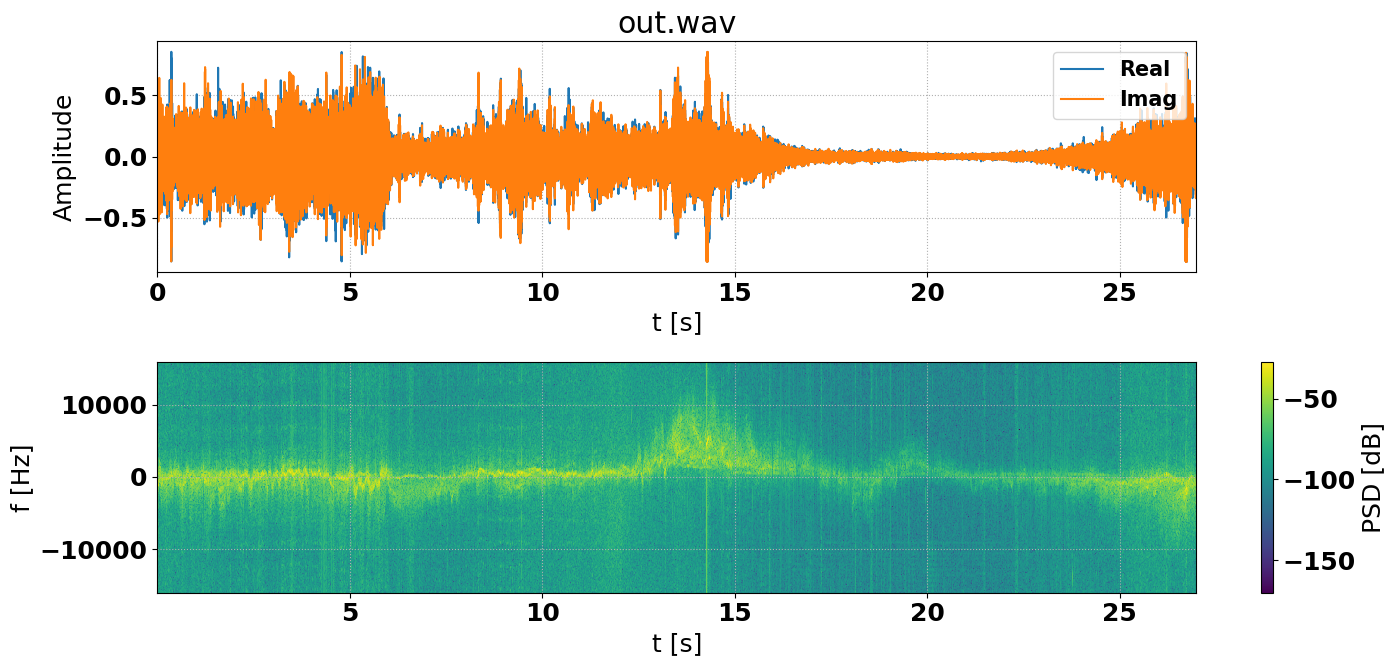

In [27]:
# Plot the signal and spectrogram.
plot_cxSig(t_wav1,wav1,title=fname1)

In [41]:
fc = 15000 # Carrier Frequency

y0 = np.real(wav1*np.exp(1j*2*np.pi*fc*t_wav1))

In [42]:
y0

array([ 0.        , -0.00010818,  0.00078382, ..., -0.09327747,
        0.08139904, -0.02695465])

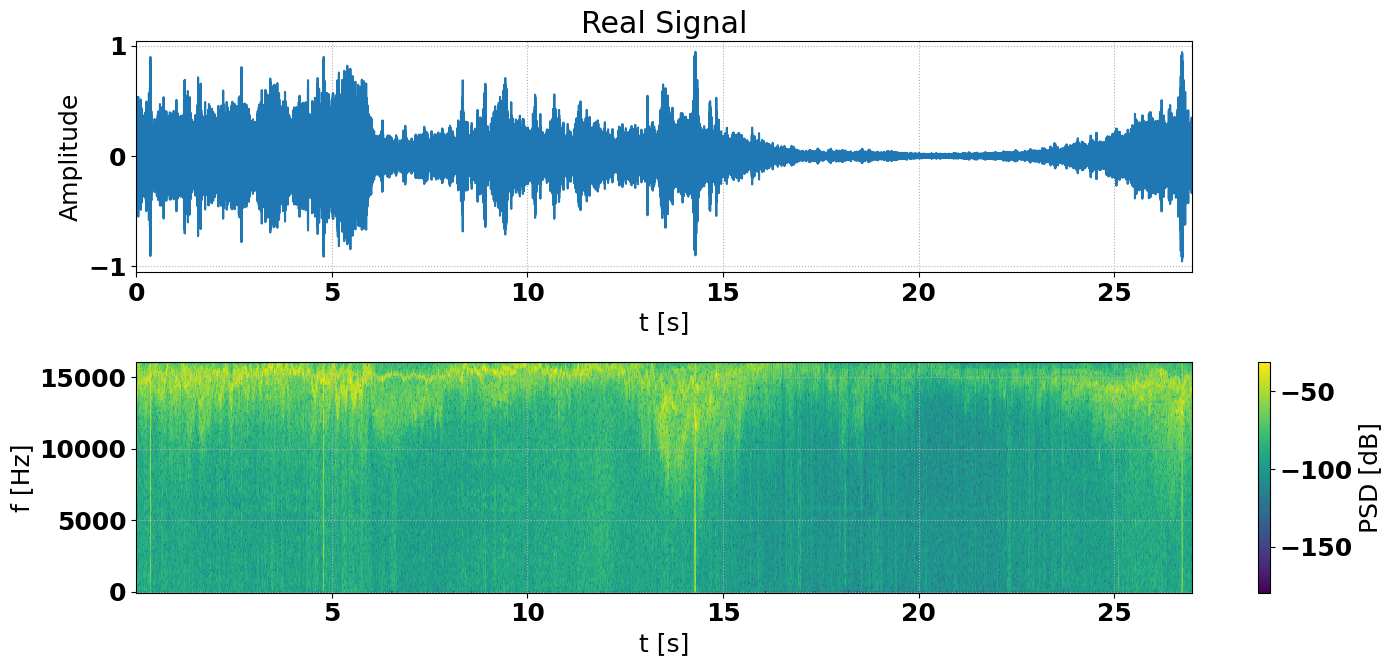

In [43]:
# Plot the signal and spectrogram.
plot_sig(t_wav1,y0,title='Real Signal')

In [44]:
play(y0,fs_wav1/2)

In [39]:
fs_wav1

32000